In [2]:
import pandas as pd

unf_path="Kopie von toedliche RF-Unfaelle ab 2013.xlsx"
unf= pd.read_excel(unf_path, skiprows=3)#, nrows=20)

In [3]:
unf.head()

,Index,Datum,Ort,Lage*,Straße*,Wegart*,Typ*,Kommentar* (Stand: 16.11.2019),Sex,Alter,Pedelec,Gegner,Schuld*,Key,PLZ,Population,Land
0,19-410,2019-11-14,Mannheim,a,k,FB,solo,Kollaps? RRF,m,61.0,NaN,solo,s,799,68219,309000,BW
1,19-409,2019-11-11,Belm,a,k,RVA,VF,"RF NS, AF HS",m,72.0,NaN,PKW,r,399,49191,14000,NI
2,19-408,2019-11-08,Hagen,a,w,Weg,solo,Kollaps auf Waldweg,m,68.0,NaN,solo,s,762,58093,189000,NRW
3,19-407,2019-11-08,Bielefeld,a,k,RVA,Einfahren,"RF zieht v Seitenstreifen-GRW n li, AF v hi",m,89.0,NaN,PKW,r,399,33689,334000,NRW
4,19-406,2019-11-04,Bielefeld,i,h,RVA,andere,"RF LA, AF v hi, Sprinter",w,65.0,NaN,LKW,g,201,33619,334000,NRW


In [4]:
unf['Datum'] =  pd.to_datetime(unf['Datum'])
unf['year']=unf['Datum'].dt.year

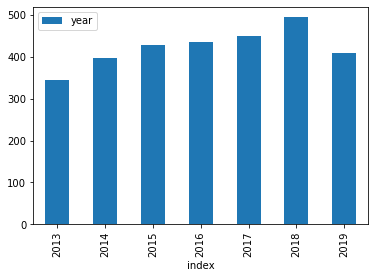

In [7]:
unf.year.value_counts().reset_index().sort_values('index').set_index('index').plot(kind='bar')

## Alle getöteten Radfahrer nach Jahr und Alter

In [8]:
import altair as alt
#alt.renderers.enable('notebook')


source = unf.groupby(['year', 'Alter']).size().reset_index()
source=source.rename(columns={0:'Anzahl'})

chart=alt.Chart(source).mark_bar(size=60,strokeOpacity=0.5,strokeWidth=0).encode(
    y='Anzahl',
    x='year:N',
    #color='Alter:Q' #:Q
    color=alt.Color('Alter:Q',#scale=alt.Scale(scheme='greenblue')),
                    scale=alt.Scale(domain=[source.Alter.max(), source.Alter.min()],
                                    scheme=alt.SchemeParams(name='spectral')))

).properties(
    width=600,
    height=400,
    title='getötete Radfahrer nach Alter'
)
chart

alt.Chart(...)

In [9]:
unf['Typ*'].value_counts()

solo         949
VF           490
andere       412
FQ           341
RA           258
Ü            178
BÜ           101
unklar        84
frontal       77
Einfahren     72
Name: Typ*, dtype: int64

In [10]:
unf[unf['Typ*']=='RA']

,Index,Datum,Ort,Lage*,Straße*,Wegart*,Typ*,Kommentar* (Stand: 16.11.2019),Sex,Alter,Pedelec,Gegner,Schuld*,Key,PLZ,Population,Land,year
15,19-395,2019-10-29,Gelsenkirchen,i,h,RVA,RA,"LKW, RW",m,35.0,x,LKW,g,243,45894,261000,NRW,2019
16,19-394,2019-10-29,Halle (Saale),i,h,RVA,RA,"LKW, RW",w,20.0,NaN,LKW,g,243,6114,240000,ST,2019
22,19-388,2019-10-15,Leipzig,i,h,RVA,RA,"LKW, RFS",m,44.0,NaN,LKW,g,243,4179,588000,SN,2019
33,19-377,2019-10-21,Kisdorf,i,h,RVA,RA,"PKW, RW",w,11.0,NaN,PKW,g,244,24629,4000,SH,2019
35,19-375,2019-10-12,Bochum Herne,i,h,FB,RA,"PKW, FB, 120°-Winkel",m,84.0,x,PKW,g,232,44805,364000,NRW,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2917,13-046,2013-04-16,Stadtlohn,i,h,RVA,RA,"LKW, RW in KV",w,72.0,NaN,LKW,g,243,48703,20000,NRW,2013
2923,13-040,2013-04-10,Köln,i,h,RVA,RA,"LKW, Ende Radweg",w,29.0,NaN,LKW,g,243,50825,1060000,NRW,2013
2933,13-030,2013-03-16,Rheinstetten,i,h,RVA,RA,"LKW, RF überholt auf FB li und zieht beim RA v...",m,63.0,NaN,LKW,g,232,76287,20000,BW,2013
2954,13-009,2013-01-23,Lübeck,i,h,RVA,RA,"LKW, RW an Supermarkteinfahrt",w,53.0,NaN,LKW,g,243,23552,210000,SH,2013


In [11]:
unf[unf['Typ*']=='RA'].groupby('Sex')['Alter'].mean()

Sex
m    56.541667
w    50.926471
Name: Alter, dtype: float64

In [12]:
source

,year,Alter,Anzahl
0,2013,11.0,1
1,2013,12.0,2
2,2013,15.0,5
3,2013,16.0,1
4,2013,17.0,1
...,...,...,...
539,2019,86.0,3
540,2019,87.0,2
541,2019,88.0,1
542,2019,89.0,3


In [13]:
source=unf[unf['Typ*']=='RA']

source = unf[unf['Typ*']=='RA'].groupby(['Sex','Alter']).size().reset_index()
source=source.rename(columns={0:'Anzahl'})

chart=alt.Chart(source).mark_bar(size=60,strokeOpacity=0.5,strokeWidth=0).encode(
    y='sum(Anzahl):Q',
    x='Sex:N',
    color='Alter:Q'

).properties(
    width=600,
    height=400,
    title='getötete Radfahrer seit 2013 bei RA nach Alter'
)
chart

alt.Chart(...)

In [14]:
chart

alt.Chart(...)

## Bei Fahrbahnquerung getötete Radfahrer nach Jahr und Alter

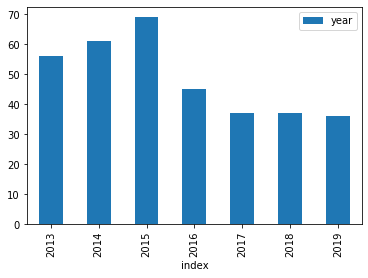

In [15]:
unf_fq=unf[unf['Typ*']=='FQ'].copy()
unf_fq.year.value_counts().reset_index().sort_values('index').set_index('index').plot(kind='bar')

In [16]:
import altair as alt
alt.renderers.enable('notebook')

unf_fq=unf[unf['Typ*']=='FQ'].copy()
source = unf_fq.groupby(['year', 'Alter']).size().reset_index()
source=source.rename(columns={0:'Anzahl'})

alt.Chart(source).mark_bar(size=60,strokeOpacity=0.5,strokeWidth=0).encode(
    y='Anzahl',
    x='year:N',
    #color='Alter:Q' #:Q
    color=alt.Color('Alter:Q',#scale=alt.Scale(scheme='greenblue')),
                    scale=alt.Scale(domain=[source.Alter.max(), source.Alter.min()],
                                    scheme=alt.SchemeParams(name='spectral')))

).properties(
    width=600,
    height=400,
    title='getötete Radfahrer bei Fahrbahnquerung nach Alter'
)

ValueError: 
To use the 'notebook' renderer, you must install the vega package
and the associated Jupyter extension.
See https://altair-viz.github.io/getting_started/installation.html
for more information.


## Bei Rechtsabbieger getötete Radfahrer nach Jahr und Alter

In [19]:
import altair as alt
#alt.renderers.enable('notebook')

unf_ra=unf[unf['Typ*']=='RA'].copy()
source = unf_ra.groupby(['year', 'Alter']).size().reset_index()
source=source.rename(columns={0:'Anzahl'})

alt.Chart(source).mark_bar(size=60,strokeOpacity=0.5,strokeWidth=0).encode(
    y='Anzahl',
    x='year:N',
    #color='Alter:Q' #:Q
    color=alt.Color('Alter:Q',#scale=alt.Scale(scheme='greenblue')),
                    scale=alt.Scale(domain=[source.Alter.max(), source.Alter.min()],
                                    scheme=alt.SchemeParams(name='spectral')))

).properties(
    width=600,
    height=400,
    title='getötete Radfahrer bei Rechstabbieger nach Alter'
)

alt.Chart(...)

In [20]:
import altair as alt
#alt.renderers.enable('notebook')

unf_ra=unf[unf['Typ*']=='RA'].copy()
source = unf_ra.groupby(['year', 'Alter','Sex']).size().reset_index()
source=source.rename(columns={0:'Anzahl'})

alt.Chart(source).mark_bar(size=25,strokeOpacity=0.5,strokeWidth=0).encode(
    y='Anzahl',
    
    #color='Alter:Q' #:Q
    color=alt.Color('Alter:Q',#scale=alt.Scale(scheme='greenblue')),
                    scale=alt.Scale(domain=[source.Alter.max(), source.Alter.min()],
                                    scheme=alt.SchemeParams(name='spectral'))),
    x="Sex",
    column='year:N',

).properties(
    width=80,
    title='getötete Radfahrer bei Rechstabbieger nach Alter und Geschlecht'
)

alt.Chart(...)

In [21]:
import altair as alt
#alt.renderers.enable('notebook')

unf_ra=unf[unf['Typ*']=='VF'].copy()
source = unf_ra.groupby(['year', 'Alter','Sex']).size().reset_index()
source=source.rename(columns={0:'Anzahl'})

alt.Chart(source).mark_bar(size=25,strokeOpacity=0.5,strokeWidth=0).encode(
    y='Anzahl',
    
    #color='Alter:Q' #:Q
    color=alt.Color('Alter:Q',#scale=alt.Scale(scheme='greenblue')),
                    scale=alt.Scale(domain=[source.Alter.max(), source.Alter.min()],
                                    scheme=alt.SchemeParams(name='spectral'))),
    x="Sex",
    column='year:N',

).properties(
    width=80,
    title='getötete Radfahrer bei "Vorfahrt" nach Alter und Geschlecht'
)

alt.Chart(...)

In [22]:
unf.head()

,Index,Datum,Ort,Lage*,Straße*,Wegart*,Typ*,Kommentar* (Stand: 16.11.2019),Sex,Alter,Pedelec,Gegner,Schuld*,Key,PLZ,Population,Land,year
0,19-410,2019-11-14,Mannheim,a,k,FB,solo,Kollaps? RRF,m,61.0,NaN,solo,s,799,68219,309000,BW,2019
1,19-409,2019-11-11,Belm,a,k,RVA,VF,"RF NS, AF HS",m,72.0,NaN,PKW,r,399,49191,14000,NI,2019
2,19-408,2019-11-08,Hagen,a,w,Weg,solo,Kollaps auf Waldweg,m,68.0,NaN,solo,s,762,58093,189000,NRW,2019
3,19-407,2019-11-08,Bielefeld,a,k,RVA,Einfahren,"RF zieht v Seitenstreifen-GRW n li, AF v hi",m,89.0,NaN,PKW,r,399,33689,334000,NRW,2019
4,19-406,2019-11-04,Bielefeld,i,h,RVA,andere,"RF LA, AF v hi, Sprinter",w,65.0,NaN,LKW,g,201,33619,334000,NRW,2019


In [23]:
import numpy as np

In [24]:
table = pd.pivot_table(unf, values='Alter', index=['Sex'],  columns=['Typ*'], aggfunc='count')

In [25]:
table

Typ*,BÜ,Einfahren,FQ,RA,VF,andere,frontal,solo,unklar,Ü
Sex,,,,,,,,,,
m,78,52,254,120,337,271,67,771,53,138
w,21,17,87,136,139,130,9,92,22,40


In [26]:
table.unstack().reset_index()

,Typ*,Sex,0
0,BÜ,m,78
1,BÜ,w,21
2,Einfahren,m,52
3,Einfahren,w,17
4,FQ,m,254
5,FQ,w,87
6,RA,m,120
7,RA,w,136
8,VF,m,337
9,VF,w,139


In [27]:
import altair as alt
#alt.renderers.enable('notebook')

#unf_ra=unf[unf['Typ*']=='VF'].copy()
source = table.unstack().reset_index()
source=source.rename(columns={0:'Anzahl'})

alt.Chart(source).mark_bar(size=25,strokeOpacity=0.5,strokeWidth=0).encode(
    y='Anzahl',

    x="Sex",
    column='Typ*:N',

).properties(
    width=80,
    title='getötete Radfahrer bei Rechstabbieger nach Alter und Geschlecht'
)

alt.Chart(...)

In [28]:
#table.melt()

## Bei Einzelfahrunfällen getötete Radfahrer nach Jahr und Alter

In [29]:
import altair as alt
alt.renderers.enable('notebook')

unf_solo=unf[unf['Typ*']=='solo'].copy()
source = unf_solo.groupby(['year', 'Alter']).size().reset_index()
source=source.rename(columns={0:'Anzahl'})

alt.Chart(source).mark_bar(size=60,strokeOpacity=0.5,strokeWidth=0).encode(
    y='Anzahl',
    x='year:N',
    #color='Alter:Q' #:Q
    color=alt.Color('Alter:Q',#scale=alt.Scale(scheme='greenblue')),
                    scale=alt.Scale(domain=[source.Alter.max(), source.Alter.min()],
                                    scheme=alt.SchemeParams(name='spectral')))

).properties(
    width=600,
    height=400,
    title='getötete Radfahrer bei Einzelfahrunfällen nach Alter'
)

ValueError: 
To use the 'notebook' renderer, you must install the vega package
and the associated Jupyter extension.
See https://altair-viz.github.io/getting_started/installation.html
for more information.


## Bei Überholvorgängen getötete Radfahrer nach Jahr und Alter

In [30]:
import altair as alt
alt.renderers.enable('notebook')

unf_ue=unf[unf['Typ*']=='Ü'].copy()
source = unf_ue.groupby(['year', 'Alter']).size().reset_index()
source=source.rename(columns={0:'Anzahl'})

alt.Chart(source).mark_bar(size=60,strokeOpacity=0.5,strokeWidth=0).encode(
    y='Anzahl',
    x='year:N',
    #color='Alter:Q' #:Q
    color=alt.Color('Alter:Q',#scale=alt.Scale(scheme='greenblue')),
                    scale=alt.Scale(domain=[source.Alter.max(), source.Alter.min()],
                                    scheme=alt.SchemeParams(name='spectral')))

).properties(
    width=600,
    height=400,
    title='getötete Radfahrer bei Überholen nach Alter'
)

ValueError: 
To use the 'notebook' renderer, you must install the vega package
and the associated Jupyter extension.
See https://altair-viz.github.io/getting_started/installation.html
for more information.


---
## getötete Radfahrer nach Unfalltyp und Alter

In [33]:
import altair as alt
#alt.renderers.enable('notebook')

#unf_ue=unf[unf['Typ*']=='Ü'].copy()
source = unf.groupby(['Typ*', 'Alter']).size().reset_index()
source=source.rename(columns={0:'Anzahl'})

alt.Chart(source).mark_bar(size=60,strokeOpacity=0.5,strokeWidth=0).encode(
    y='Anzahl',
    x='Typ*:N',
    #color='Alter:Q' #:Q
    color=alt.Color('Alter:Q',#scale=alt.Scale(scheme='greenblue')),
                    scale=alt.Scale(domain=[source.Alter.max(), source.Alter.min()],
                                    scheme=alt.SchemeParams(name='spectral')))

).properties(
    width=600,
    height=400,
    title='getötete Radfahrer bei Überholen nach Alter'
)

alt.Chart(...)

In [34]:
####################

##  getötete Radfahrer nach Alter und Unfalltyp

In [35]:
bins=range(0,100,10)
groups = unf.groupby(['Typ*', pd.cut(unf.Alter, bins)])
groups_bins=groups.size().reset_index()#.unstack()
groups_bins=groups_bins.rename(columns={0:'Anzahl'})

groups_bins.Alter=groups_bins.Alter.astype(str)
groups_bins.Alter=groups_bins.Alter.str.replace('(',"").str.replace(', '," bis ").str.replace(']',"")

In [36]:
import altair as alt

source = groups_bins

alt.Chart(source).mark_bar().encode(

    x='Typ*:O',
    y='Anzahl:Q',
    color='Typ*:N',
    column='Alter:N',
    tooltip=['Anzahl']
)

alt.Chart(...)

##  getötete Radfahrer nach Alter und Unfallgegner

In [37]:
bins=range(0,100,10)
groups = unf.groupby(['Gegner', pd.cut(unf.Alter, bins)])
groups_bins=groups.size().reset_index()#.unstack()
groups_bins=groups_bins.rename(columns={0:'Anzahl'})

groups_bins.Alter=groups_bins.Alter.astype(str)
groups_bins.Alter=groups_bins.Alter.str.replace('(',"").str.replace(', '," bis ").str.replace(']',"")

In [38]:
source = groups_bins

alt.Chart(source).mark_bar().encode(

    x='Gegner:O',
    y='Anzahl:Q',
    color='Gegner:N',
    column='Alter:N',
    tooltip=['Anzahl']
)

alt.Chart(...)

In [39]:
source = groups_bins

chart=alt.Chart(source).mark_bar().encode(

    x='Gegner:O',
    y='sum(Anzahl):Q',
    color='Gegner:N',
    tooltip=['sum(Anzahl)']
)

    
    
chart #+ text

alt.Chart(...)

##  getötete Radfahrer nach Gemeindegröße und Unfallgegner

In [40]:
bins=[0,4000,10000,20000,50000,250000,5000000]
groups = unf.groupby(['Gegner', pd.cut(unf.Population, bins)])
groups_bins=groups.size().reset_index()#.unstack()
groups_bins=groups_bins.rename(columns={0:'Anzahl'})

groups_bins.Population=groups_bins.Population.astype(str)
#groups_bins.Population=groups_bins.Population.str.replace('(',"").str.replace(', '," bis ").str.replace(']',"")

In [41]:
source = groups_bins

chart=alt.Chart(source).mark_bar().encode(

    #x='Population:O',
    x=alt.X(
        'Population:O',
        sort=alt.EncodingSortField(
            field="Population",  # The field to use for the sort
            order="ascending"  # The order to sort in
        )),
    y='sum(Anzahl):Q',
    color='Population:N',
    tooltip=['sum(Anzahl)']
)

    
    
chart #+ text

alt.Chart(...)

In [42]:
source = groups_bins

alt.Chart(source).mark_bar().encode(

    x='Gegner:O',
    y='Anzahl:Q',
    color='Gegner:N',
    #facet='Population:O',
    facet=alt.Facet('Population:O',
        sort=alt.EncodingSortField('Population', order='descending')
    ),
    
    tooltip=['Anzahl']
)

alt.Chart(...)

##  getötete Radfahrer nach Gemeindegröße und Unfalltyp

In [43]:
bins=[0,4000,10000,20000,50000,250000,5000000]
groups = unf.groupby(['Typ*', pd.cut(unf.Population, bins)])
groups_bins=groups.size().reset_index()#.unstack()
groups_bins=groups_bins.rename(columns={0:'Anzahl'})

groups_bins.Population=groups_bins.Population.astype(str)
#groups_bins.Population=groups_bins.Population.str.replace('(',"").str.replace(', '," bis ").str.replace(']',"")

source = groups_bins

alt.Chart(source).mark_bar().encode(

    x='Typ*:O',
    y='Anzahl:Q',
    color='Typ*:N',
    #facet='Population:O',
    facet=alt.Facet('Population:O',
        sort=alt.EncodingSortField('Population', order='descending')
    ),
    
    tooltip=['Anzahl']
)

alt.Chart(...)

In [44]:
bins=[0,4000,10000,20000,50000,250000,5000000]
groups = unf.groupby(['Gegner', pd.cut(unf.Population, bins),'year',])
groups_bins=groups.size().reset_index()#.unstack()
groups_bins=groups_bins.rename(columns={0:'Anzahl'})

groups_bins.Population=groups_bins.Population.astype(str)
#groups_bins.Population=groups_bins.Population.str.replace('(',"").str.replace(', '," bis ").str.replace(']',"")

In [45]:
groups_bins

,Gegner,Population,year,Anzahl
0,?,"(0, 4000]",2014,1
1,?,"(0, 4000]",2017,1
2,?,"(0, 4000]",2019,3
3,?,"(4000, 10000]",2015,1
4,?,"(4000, 10000]",2016,2
...,...,...,...,...
327,sonstige,"(20000, 50000]",2018,1
328,sonstige,"(50000, 250000]",2015,1
329,sonstige,"(50000, 250000]",2018,1
330,sonstige,"(50000, 250000]",2019,1


In [46]:
source = groups_bins


#for y in source.year.unique():

source_y=source[source.year==2015].copy()

source_y['length'] = source_y['Population'].str.len()
source_y.sort_values('length', ascending=True, inplace=True)

chart15= alt.Chart(source_y).mark_bar().encode(

    x='Gegner:O',
    y='Anzahl:Q',
    color='Gegner:N',
    #facet='Population:O',
    facet=alt.Facet('Population:O',
        sort=alt.EncodingSortField('Population', order='descending')
    ),

    tooltip=['year','Anzahl']
)

source_y=source[source.year==2016].copy()

source_y['length'] = source_y['Population'].str.len()
source_y.sort_values('length', ascending=True, inplace=True)

chart16= alt.Chart(source_y).mark_bar().encode(

    x='Gegner:O',
    y='Anzahl:Q',
    color='Gegner:N',
    #facet='Population:O',
    facet=alt.Facet('Population:O',
        sort=alt.EncodingSortField('Population', order='descending')
    ),

    tooltip=['year','Anzahl']
)

source_y=source[source.year==2017].copy()

source_y['length'] = source_y['Population'].str.len()
source_y.sort_values('length', ascending=True, inplace=True)

chart17= alt.Chart(source_y).mark_bar().encode(

    x='Gegner:O',
    y='Anzahl:Q',
    color='Gegner:N',
    #facet='Population:O',
    facet=alt.Facet('Population:O',
        sort=alt.EncodingSortField('Population', order='descending')
    ),

    tooltip=['year','Anzahl']
)

source_y=source[source.year==2018].copy()

source_y['length'] = source_y['Population'].str.len()
source_y.sort_values('length', ascending=True, inplace=True)

chart18= alt.Chart(source_y).mark_bar().encode(

    x='Gegner:O',
    y='Anzahl:Q',
    color='Gegner:N',
    #facet='Population:O',
    facet=alt.Facet('Population:O',
        sort=alt.EncodingSortField('Population', order='descending')
    ),

    tooltip=['year','Anzahl']
)

source_y=source[source.year==2019].copy()

source_y['length'] = source_y['Population'].str.len()
source_y.sort_values('length', ascending=True, inplace=True)

chart19= alt.Chart(source_y).mark_bar().encode(

    x='Gegner:O',
    y='Anzahl:Q',
    color='Gegner:N',
    #facet='Population:O',
    facet=alt.Facet('Population:O',
        sort=alt.EncodingSortField('Population', order='descending')
    ),

    tooltip=['year','Anzahl']
)



chart15 & chart16 & chart17 & chart18 & chart19

alt.VConcatChart(...)

In [47]:
#source_y.sort_values('Population')
source_y.Population.str.len().sort_values()

2       9
321     9
176     9
109     9
208     9
135     9
264     9
77      9
45      9
282     9
142    13
289    13
182    13
80     13
51     13
215    13
5      14
86     14
92     14
63     14
58     14
114    14
156    14
119    14
149    14
303    14
296    14
189    14
222    14
229    14
272    14
198    15
330    15
68     15
163    15
99     15
32     15
251    15
9      15
310    15
236    15
39     17
106    17
201    17
170    17
72     17
243    17
128    17
258    17
317    17
Name: Population, dtype: int64